# Docker介绍

```
Docker中文社区文档
Docker 是一个开源的软件部署解决方案。
Docker 也是轻量级的应用容器框架。
Docker 可以打包、发布、运行任何的应用。
Docker 就像一个盒子，里面可以装很多物件，如果需要某些物件，可以直接将该盒子拿走，而不需要从该盒子中一件一件的取。
Docker 是一个客户端-服务端(C/S)架构程序。
客户端只需要向服务端发出请求，服务端处理完请求后会返回结果。
Docker 包括三个基本概念:
```
#### 镜像（Image）

- Docker的镜像概念类似于虚拟机里的镜像，是一个只读的模板，一个独立的文件系统，包括运行容器所需的数据，可以用来创建新的容器。
  例如：一个镜像可以包含一个完整的 ubuntu 操作系统环境，里面仅安装了MySQL或用户需要的其它应用程序。

#### 容器（Container）

- Docker容器是由Docker镜像创建的运行实例，类似VM虚拟机，支持启动，停止，删除等。
  每个容器间是相互隔离的，容器中会运行特定的应用，包含特定应用的代码及所需的依赖文件。

#### 仓库（Repository）

-    Docker的仓库功能类似于Github，是用于托管镜像的。

#### dock中文社区
http://www.docker.org.cn/index.html

# Docker 安装步骤

- 1.源码安装Docker 

```shell
cd docker源码目录
sudo apt-key add gpg
sudo dpkg -i docker-ce_17.03.2~ce-0~ubuntu-xenial_amd64.deb
```
- 2. 检查Docker 是否安装正确(注意:联网状态)

```shell
sudo docker run hello-world

```
- 3.启动与停止
- 安装完成Docker后，默认已经启动了docker服务。

```shell  
启动docker

sudo service docker start

重启docker

sudo service docker restart

停止docker

sudo service docker stop

```

## 1.Docker镜像操作
- 查看所有镜像列表

```shell
sudo docker image ls

或者

sudo docker images
```

* REPOSITORY：镜像所在的仓库名称 
* TAG：镜像标签 
* IMAGEID：镜像ID 
* CREATED：镜像的创建日期(不是获取该镜像的日期) 
* SIZE：镜像大小


## 2.安装镜像

- 2.1 从仓库拉取镜像

```shell
官方镜像
sudo docker image pull 镜像名称 或者 sudo docker image pull library/镜像名称
sudo docker image pull ubuntu 或者 sudo docker image pull library/ubuntu
sudo docker image pull ubuntu:16.04 或者 sudo docker image pull library/ubuntu:16.04
```
```shell  
个人镜像
sudo docker image pull 仓库名称/镜像名称
sudo docker image pull itcast/fastdfs
```  

- 2.2 从本地导入镜像 镜像解压

```shell
sudo docker load -i 文件路径/镜像文件

```


## 3.删除镜像

```shell
sudo docker image rm 镜像名或镜像ID
sudo docker image rm hello-world
sudo docker image rm fce289e99eb9

```

- 删除镜像报错
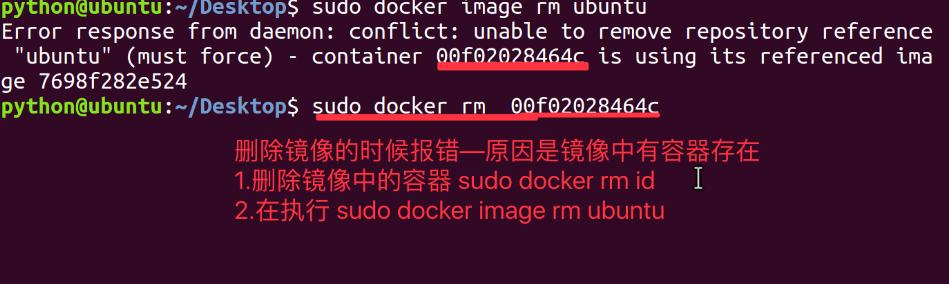

# Docker容器操作
- 查看正在运行的容器

```shell
sudo docker container ls

#查看所有的容器
sudo docker container ls --all

```

- 2.创建新容器

```shell
sudo docker run [option] 镜像名 [向启动容器中传入的命令]
```
- 常用可选参数说明：
```
    * -i 表示以《交互模式》运行容器。
    * -t 表示容器启动后会进入其命令行。加入这两个参数后，容器创建就能登录进去。即分配一个伪终端。
    * --name 为创建的容器命名。
    * -v 表示目录映射关系，即宿主机目录:容器中目录。注意:最好做目录映射，在宿主机上做修改，然后共享到容器上。 
    * -d 会创建一个守护式容器在后台运行(这样创建容器后不会自动登录容器)。 
    * -p 表示端口映射，即宿主机端口:容器中端口。
    * --network=host 表示将主机的网络环境映射到容器中，使容器的网络与主机相同。
```

- 3.交互式容器

```shell
sudo docker run -it --name=ubuntu1 ubuntu /bin/bash
``` 

- **在容器中可以随意执行linux命令，就是一个ubuntu的环境。
- **当执行 exit 命令退出时，该容器随之停止。**

- 4.开启守护式容器

```shell
sudo docker run -dit --name=ubuntu2 ubuntu

```

- 进入到容器内部交互环境

```shell
sudo docker exec -it 

容器名或容器id 进入后执行的第一个命令

sudo docker exec -it ubuntu2 /bin/bash
```


```如果对于一个需要长期运行的容器来说，我们可以创建一个守护式容器。
在容器内部执行 exit 命令退出时，该容器也随之停止。
```

- 5.停止和启动容器

```shell
停止容器

sudo docker container stop 容器名或容器id

# kill掉容器
sudo docker container kill 容器名或容器id

# 启动容器
sudo docker container start 容器名或容器id
```

- 6.删除容器

```shell
注意点:正在运行的容器无法直接删除
sudo docker container rm 容器名或容器id
```

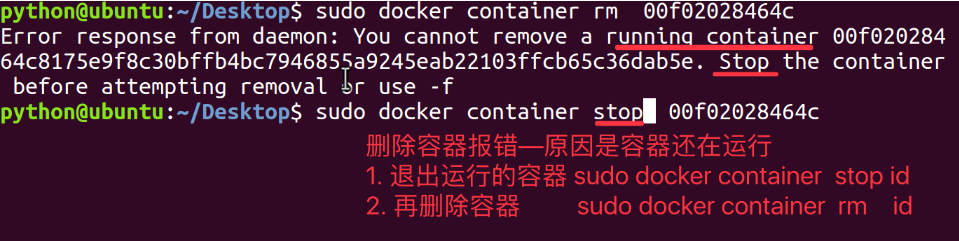

# 容器制作成镜像导出

为保证已经配置完成的环境可以重复利用，我们可以将容器制作成镜像导出方便别人和以后使用。

- 1. 将容器制作成镜像

```shell
sudo docker commit 容器名 镜像名
```

- 2. 将镜像打包导出

```shell
sudo docker save -o 保存的文件名.tar 镜像名
```

- 3.使用打包好的镜像

```shell
sudo docker load -i 文件路径/备份文件
```